# Homework 01: Data Cleaning and Exploratory Data Analysis 
***

**Name**: Felipe Lima

***

This assignment is due on Canvas by **6:00PM on Friday September 10**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

### Problem 1  (10 Points)
***

<img style="float: right; width: 200px; padding: 3mm;" src="attachment:Screen%20Shot%202021-08-16%20at%2011.50.04%20AM.png" alt="Drawing"/> 

**Part A (5 of 10 points):** There is a new co-ed engineering dorm on campus. It is called "Casa Matt & Trey", or CMT dorm. CMT dorm has 4 floors. Each floor has 24 students; 12 men and 12 women per floor. Furthermore the first floor is reserved for 18-year olds, the second floor for 19-year olds, the third floor for 20-year olds, and the 4th floor for 21-year olds. All 96 students are listed on a dorm roster.

The administration is interested in the student opinion of the new dorm. A survey is sent to 2 randomly chosen 18-year old women, 2 randomly chosen 19-year old women, 2 randomly chosen 20-year women and 2 randomly chosen 21-year old women. Then the same process is done for the various ages of men in the dorm all of whose names were listed on the roster.

$$ \quad $$
    
Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the variable of interest

$\color{red}{\text{Solution to Part A in this cell.}}$

- The **population** in this problem is the collective of students who live in the CMT dorm.
- The **sample frame** is the dorm roster.
- The **sample** is two people from each age and gender. More speciffically two 18-year old women, two 19-year old women, two 20-year old women, two 21-year old women, two 18-year old men, two 19-year old men, two 20-year old men and two 21-year old men.
- The **type of sample** is a stratified sample.
- The **variable of interest** is the student's opinion of the new dorm.

**Part B (5 of 10 points):** After analyzing the results the administration decides it is wiser to perform a census sample of CMT dorm to determine the opinion of the new facility.

Answer the following:

- What is the population 
- What is the sample frame 
- What is the sample 
- How many people were surveyed this time around
- If everyone honestly answered the survey, then is this data biased towards a particular age group or gender?

$\color{red}{\text{Solution to Part B in this cell.}}$

- The **population** in this problem is the collective of students who live in the CMT dorm.
- The **sample frame** is the dorm roster.
- The **sample** in this problem is every student in the roster for the CMT dorm (everyone in the population).
- In this survey all 96 students who live in the CMT dorm were surveyed.
- The data wouldn't be biased because the dorm is divided with exactly 48 male and 48 female students as well as the same number of students (24) of each age group (18,19,20,21 year old).

## Problem 2 (30 points)
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}$ and sample variance $s^2$ are given by 

$$
\bar{x} = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2 = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}\right)^2 
$$

Recall that the standard deviation is typically found by taking the square root of the variance.

Notice that the above computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. Additionally, this manner of computing sample variance can lead to numerical problems and inefficiencies. For example, if the $x$'s are "large" and the differences between them "small", computing the sample variance using the formula above requires computing a small number as the difference of two small numbers. Not good! Check out this optional wikipedia article about [Loss of Significance](https://en.wikipedia.org/wiki/Loss_of_significance) to learn more.

It is often useful to be able to compute the variance and/or standard deviation in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem (part B), we will compute the variance as the data arrives one at a time; we will thus not need to save the data for a second pass.  

**Part A (5 points)**: It is common to manipulate expressions algebraically to rewrite them in a more convenient way. We will practice this idea on the following identity. Please note that either side of the identity does not solve the numerical issues noted above. This is simply a mathematical exercise to see how to manipulate an expression and change its form.

Prove the following identity by algbraically manipulating one side to derive the other side.

$$
\displaystyle s^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1} = \frac{1}{n(n-1)} \left(n \cdot \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i \right)^2 \right)
$$

$\color{red}{\text{Solution to Part A in this cell.}}$

$$
\displaystyle s^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1} = \frac{1}{n(n-1)} \left(n \cdot \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i \right)^2 \right)
$$

$$
\frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1} = \frac{\sum_{i=1}^n (x_i^2 - 2x_i\bar{x} +\bar{x}^2)}{n-1}
$$

$$
= \frac{\sum_{i=1}^n (x_i^2) - \sum_{i=1}^n(2x_i\bar{x}) +\sum_{i=1}^n(\bar{x})^2}{n-1}
$$

$$
= \frac{\sum_{i=1}^n (x_i^2) - 2\bar{x}\sum_{i=1}^n(x_i) + (\bar{x})^2\sum_{i=1}^n(1)}{n-1}
$$

$$
= \frac{\sum_{i=1}^n (x_i^2) - 2\bar{x}\sum_{i=1}^n(x_i) + (\bar{x})^2}{n-1}
$$

Using the definition of the sample mean $\bar{x}$

$$
= \frac{\sum_{i=1}^n (x_i^2) - 2(\frac{1}{n}\sum_{i=1}^n x_i)\sum_{i=1}^n(x_i) + (\frac{1}{n}\sum_{i=1}^n x_i)^2}{n-1}
$$

$$
= \frac{\sum_{i=1}^n (x_i^2) - 2\frac{1}{n}(\sum_{k=1}^n x_k)^2 + (\frac{1}{n}\sum_{k=1}^n x_k)^2}{n-1}
$$

$$
= \frac{1}{n-1} \left( \sum_{i=1}^n (x_i^2) - (\frac{1}{n}\sum_{k=1}^n x_k)^2 \right)
$$

$$
\frac{1}{n(n-1)} \left(n \cdot \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i \right)^2 \right)
$$

$$
\therefore \displaystyle s^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1} = \frac{1}{n(n-1)} \left(n \cdot \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i \right)^2 \right)
$$

**Part B (10 points):** Use the following algorithm to complete the function `running_variance` below that returns a running estimate of the variance. This function takes a list of integers as input and returns the variance of the list once we have iterated through the entire data set.

This algorithm provides a recursive way to compute the standard deviation and the mean as we make one pass through the data set. 

Consider an arbitrary data set of $n$ elements: $[x_1, x_2 ... x_i, ... x_{n-1}, x_n]$

We will let $\bar{x}_k$ represent the mean of the first $k$ elements of this dataset. We will let $s_k$ represent the standard deviation of the first $k$ elements of this dataset. 

- Initialize $\bar{x}_1 = x_1$ and $s_1 = 0$.

- Use the recursive formulas below to update the estimate of the mean and standard deviation as we iterate though our data set.
\begin{align*}
\bar{x}_k &= \bar{x}_{k-1} + \frac{x_k - \bar{x}_{k-1}}{k} \\
s_k &= s_{k-1} + (x_k - \bar{x}_{k-1})\cdot(x_k-\bar{x}_k) \\
\end{align*}
- For $2 \leq k \leq n, \ \ s^2 = \frac{s_k}{k-1}$

Note: Don't forget as you are coding that python is 0-indexed. 

$\color{red}{\text{Solution to Part B below in code cell.}}$

In [2]:
def running_variance(x):
#type your code in here   
    length = len(x)
    mean = x[0]
    sdev = 0
    pmean = mean
    variance = 0
    
    for i in range(length):
        mean = mean + (x[i]-mean)/(i+1)
        sdev = sdev + ((x[i]- pmean)*(x[i]-mean))
        pmean = mean
        
#     print("mean", mean)
#     print("sedev", sdev)
    
    variance = sdev/(length-1)
    return variance


list = [1,2,3,4,5]
running_variance(list)

2.5

**Part C (3 points)** Read in the 'Boxing.csv' datafile.
Use the `running_variance` function from Part B to compute the variance of the 'Latino' column. 

The 'Boxing.csv' dataset was obtained from a [Harvard Dataverse site](https://dataverse.harvard.edu/dataset.xhtml;jsessionid=1439a44a49e91658631f515f0fe6?persistentId=doi%3A10.7910%2FDVN%2FRYGQM6&version=&q=&fileTypeGroupFacet=&fileAccess=&fileTag=Data&fileSortField=&fileSortOrder=). You can read the website's description of the data set below:
"All 704 male boxing champions among 8 weight divisions (Heavyweight, Light Heavyweight, Middleweight, Welterweight, Lightweight, Featherweight, Bantamweight, and Flyweight) from 1924-2011 were categorized according to his predominant or identified race; American Indian, Asian, Black, Latino, or White."

$\color{red}{\text{Solution to Part C in code cell below.}}$

In [3]:
#Type Code Here
df = pd.read_csv('Data/Boxing.csv')

running_variance(df['Latino'])

2.2272727272727275

**Part D (8 points):** Use the more "traditional" formula to compute variance. You may not use np.mean, np.std, or np.var here (or any other built in functions for these quantities.) You must complete the function `traditional_variance` below to compute variance. 

Use the formula below.

$$ s^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1} $$

$\color{red}{\text{Solution to Part D in code cell below.}}$

In [4]:
def traditional_variance(x):
#Put Code Here
    n = len(x)
    mean = sum(x)/n
    variance_t = 0
    
    for i in range(n): 
        variance_t += (x[i]-mean)**2
    
    variance_t = variance_t/(n-1)
        
    return variance_t


traditional_variance(list)
        

2.5

**Part E (3 points)** Use the `traditional_variance` function from Part D to again compute the variance of the 'Latino' column from the 'Boxing.csv' dataset.

$\color{red}{\text{Solution to Part E in code cell below.}}$

In [5]:
#Put Code Here
traditional_variance(df['Latino'])


2.2272727272727275

**Part F (1 point):** Run the following cells to analyze each of your functions from **Part B** and **Part D**. You can read about `time` [here](https://docs.python.org/3/library/time.html#time.time). You can read about `tracemalloc` and monitoring memory usage in Python [here](https://medium.com/survata-engineering-blog/monitoring-memory-usage-of-a-running-python-program-49f027e3d1ba).

Observe the results.

In [6]:
# When this cell is executed, we time the running_variance function

from time import time
import numpy as np

xx = np.arange(1000000)

# timing for the running_variance function
tbeg = time()
running_variance(xx)
tend = time()

print('took {} seconds to calculate a running estimate of variance'.format(tend-tbeg))

took 7.551810026168823 seconds to calculate a running estimate of variance


In [7]:
# When this cell is executed, we time the traditional_variance function

tbeg = time()
traditional_variance(xx)
tend = time()

print('took {} seconds to calculate a direct computation of variance'.format(tend-tbeg))

took 2.8094468116760254 seconds to calculate a direct computation of variance


In [8]:
# When this cell is executed, we investigate memory usage of the running_variance function.

import tracemalloc

tracemalloc.start()
running_variance(xx)
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Current memory usage is 0.001143MB; Peak was 0.011573MB


In [20]:
# When this cell is executed, we investigate memory usage of the traditional_variance function.

tracemalloc.start()
traditional_variance(xx)
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Current memory usage is 0.001254MB; Peak was 0.012084MB


$\color{red}{\text{Solution to Part F in this cell.}}$
What did you observe in the results?

I observed that the running variance although takes longer to compute, it uses less memory than the traditional variance.


### Problem 3 (30 points)
***

In this bit of data analysis we are going to look at the world of Boxing.
Boxing is a sport that holds no bias towards competitors whether they are rich or poor, blue collar or white collar, big or small, professor or student. In amateur boxing every boxer is matched by gender, age, weight, and ability; everyone is equal in the ring.

<img style="float: right; width: 200px; padding: 3mm;" src="attachment:Screen%20Shot%202021-08-22%20at%209.59.36%20AM.png" alt="Drawing"/> 

We will now analyze some professional boxing data.
This dataset contains the race of every one of eight weight-category champions in mens professional boxing between 1924 and 2011.

Each value in the dataset represents the number of champions that were a member of the particular race listed at the top of each respective column. Your job is to figure out what story the data are telling.

As usual make sure you have imported the proper libraries.

**Part A (2 points):** Read in the "Boxing.csv" datafile as a pandas dataframe. Take a look at the dataframe. You should see the number of male boxers from 8 weight categories and their race starting in 1924.

$\color{red}{\text{First solution to Part A in the code cell below.}}$

In [10]:
#Put Code Here
df = pd.read_csv('Data/Boxing.csv')
df

Year  Black  Latino  Asian  White  American Indian
0   1924      0       0      1      7                0
1   1925      1       0      0      7                0
2   1926      1       0      0      7                0
3   1927      0       0      0      8                0
4   1928      0       0      0      8                0
..   ...    ...     ...    ...    ...              ...
83  2007      2       1      3      2                0
84  2008      0       2      3      3                0
85  2009      1       1      4      2                0
86  2010      1       4      2      1                0
87  2011      1       3      3      1                0

[88 rows x 6 columns]

Now take a look at the more modern data (use the dot function $\color{blue}{\text{.tail()}}$). These should be the years ending in 2011.

$\color{red}{\text{Second solution to Part A in the code cell below.}}$

In [11]:
#Put Code Here
df.tail()

Year  Black  Latino  Asian  White  American Indian
83  2007      2       1      3      2                0
84  2008      0       2      3      3                0
85  2009      1       1      4      2                0
86  2010      1       4      2      1                0
87  2011      1       3      3      1                0

**Part B (5 points):** Suppose you think you see a different distribution of races in 1924 than you do in 2011. To help verify these thoughts, lets visualize the races of the eight various weight class champions as the years progress.

We begin exploring the data by creating smaller data sets. Specifically, create new dataframes in 11-year increments beginning in 1924. So for example, the first smaller data set will be the dataframe containing data from 1924 up to and including 1934. The second such data set will contain data from 1935 up to an including 1945, etc. Once you have finished generating these new smaller data sets, print "dfBoxing68_78" to the screen so that you (and we the graders) can verify your solution.

Note: Please follow the given naming convention for each new dataframe that you create:

- dfBoxing24_34
- dfBoxing35_45
- dfBoxing46_56
- dfBoxing57_67
- dfBoxing68_78
- dfBoxing79_89
- dfBoxing90_00
- dfBoxing01_11

$\color{red}{\text{Solution to Part B in the code cell below.}}$

In [12]:
#Put Code Here

dfBoxing24_34 = df.iloc[:11]
dfBoxing35_45 = df.iloc[11:22]
dfBoxing46_56 = df.iloc[22:33]
dfBoxing57_67 = df.iloc[33:44]
dfBoxing68_78 = df.iloc[44:55]
dfBoxing79_89 = df.iloc[55:66]
dfBoxing90_00 = df.iloc[66:77]
dfBoxing01_11 = df.iloc[77:88]


print(dfBoxing68_78)

    Year  Black  Latino  Asian  White  American Indian
44  1968      4       2      1      1                0
45  1969      2       4      0      2                0
46  1970      2       2      2      2                0
47  1971      2       3      2      1                0
48  1972      2       5      1      0                0
49  1973      2       5      0      1                0
50  1974      2       5      1      0                0
51  1975      1       6      0      1                0
52  1976      1       7      0      0                0
53  1977      1       6      0      0                1
54  1978      1       5      0      1                1


**Part C (8 points):** Now lets create side-by-side blox plots for every one of these dataframes for each race.

In other words, each race will have 8 side-by-side box plots (one for each 11-year chunk of time) in an attempt to see the distribution of champions for that race as the years progress.

import $\color{blue}{\text{matplotlib.pyplot}}$ in order to start creating some visualizations.

Plotting requirements: 
- Each group of boxplots must have a title that indicates which race's data is being displayed.
- Customize the x-axis tick labels to show each time period. (i.e. 1924-1934, 1935-1945, etc)
- Standardize the y axis limits to go from -1 to 9 for each figure.
- Self-check: You should have a total of 5 figures, each with 8 boxplots.


$\color{red}{\text{Solution to Part C in the code cell below.}}$

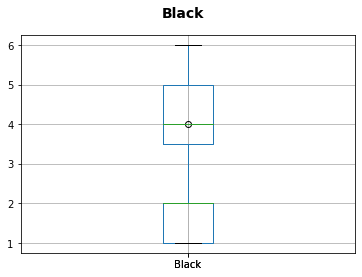

In [13]:
#Put Code Here  
import matplotlib.pyplot as plt


figB = plt.figure()
figB.suptitle('Black', fontsize=14, fontweight='bold')

boxplotBlack = dfBoxing68_78.boxplot(column=['Black'])
boxplotBlack = dfBoxing57_67.boxplot(column=['Black'])


**Part D (3 points):** Now we can interpret the graphics. Look at $Q_2$ in the progressing box-and-whisker plots for each race. Some rise, some fall, some are flat, and some oscillate.

In the context of this data, what does a fall in $Q_2$ indicate?
In the context of this data, what does a flat $Q_2$ indicate?
How would you categorize the 11-year span between 1968 and 1978 for Latino boxers?

During which 11-year span do the BNW plots show the largest IQR for Black boxers?
In the context of this data, what does a large IQR indicate?

$\color{red}{\text{Solution to Part D in this cell.}}$


**Part E (10 points):** For each year between 1924 and 2011, how many times did each race have 8 champions, or 7 champions, or 6 champions,..., all the way down to how many times did each race have 0 champions? Create histograms to visualize an answer to this question. Note, you should have 5 seperate histograms.

$\color{red}{\text{Solution to Part E in the cell below.}}$

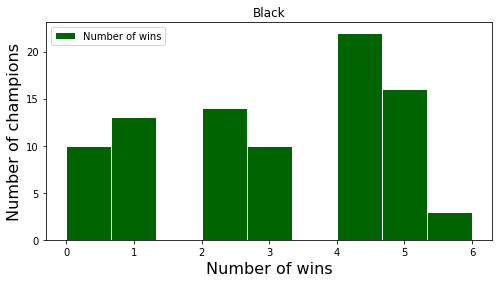

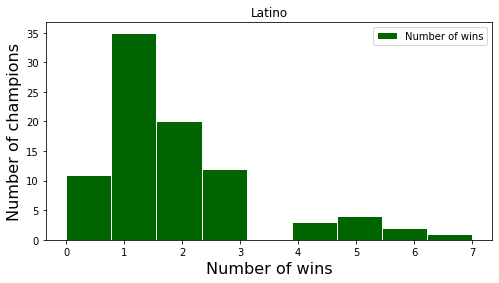

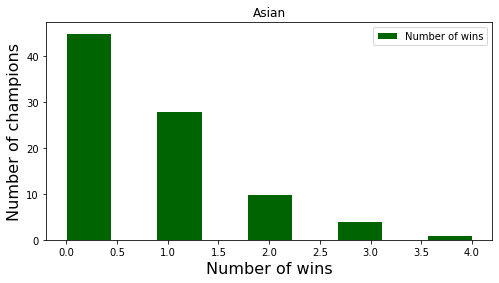

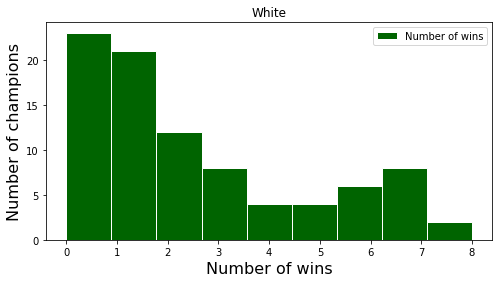

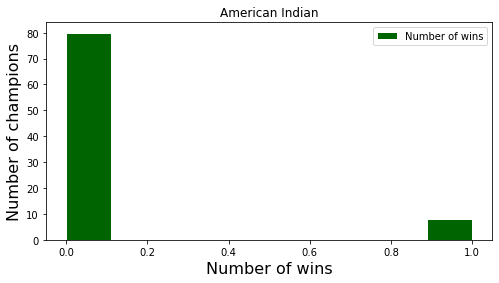

In [158]:
# Put Code Here

my_bins = range(0,9)

fig, ax = plt.subplots(figsize=(8,4))

df.hist(column="Black", bins=9, ax=ax, facecolor="darkgreen", edgecolor="white", label='Number of wins')
ax.set_xlabel("Number of wins", fontsize=16)
ax.set_ylabel("Number of champions", fontsize=16)
ax.grid(alpha=0)
ax.set_axisbelow(True)
ax.legend()


fig, ax = plt.subplots(figsize=(8,4))

df.hist(column="Latino", bins=9, ax=ax, facecolor="darkgreen", edgecolor="white", label='Number of wins')
ax.set_xlabel("Number of wins", fontsize=16)
ax.set_ylabel("Number of champions", fontsize=16)
ax.grid(alpha=0)
ax.set_axisbelow(True)
ax.legend()



fig, ax = plt.subplots(figsize=(8,4))

df.hist(column="Asian", bins=9, ax=ax, facecolor="darkgreen", edgecolor="white", label='Number of wins')
ax.set_xlabel("Number of wins", fontsize=16)
ax.set_ylabel("Number of champions", fontsize=16)
ax.grid(alpha=0)
ax.set_axisbelow(True)
ax.legend()



fig, ax = plt.subplots(figsize=(8,4))

df.hist(column="White", bins=9, ax=ax, facecolor="darkgreen", edgecolor="white", label='Number of wins')
ax.set_xlabel("Number of wins", fontsize=16)
ax.set_ylabel("Number of champions", fontsize=16)
ax.grid(alpha=0)
ax.set_axisbelow(True)
ax.legend()




fig, ax = plt.subplots(figsize=(8,4))

df.hist(column="American Indian", bins=9, ax=ax, facecolor="darkgreen", edgecolor="white", label='Number of wins')
ax.set_xlabel("Number of wins", fontsize=16)
ax.set_ylabel("Number of champions", fontsize=16)
ax.grid(alpha=0)
ax.set_axisbelow(True)
ax.legend()


**Part F (2 points):** Now we want to interpret the graphics. All of the histograms, except for one, are essentially right skewed, and the remaining histogram is nearly uniform.

Relative to this data, what does a right-skewed histogram indicate?

Relative to this data, what does a uniform histogram indicate?

$\color{red}{\text{Solution to Part F in this cell.}}$

### Problem 4 (16 points)
***

Consider the following 3 data sets:

`A=[8, 6, 7, 5, 3, 0, 9, 8, 6, 7, 5, 3, 0, 9]`

`B=[3, 14, 15, 9, 26, 5, 35, 8, 9, 7, 9]`

`C` is the random data set generated by using `np.random.randint(0,1000, size=200)`

For each data set, perform the following computations:

**Part A (4 points):** Compute and print the mean and standard deviation of the data set. Use built-in NumPy functions for calculation.

$\color{red}{\text{Solution to Part A in the code cell below.}}$

In [29]:
#Put Code Here
A=[8, 6, 7, 5, 3, 0, 9, 8, 6, 7, 5, 3, 0, 9]

B=[3, 14, 15, 9, 26, 5, 35, 8, 9, 7, 9]

C = np.random.randint(0,1000, size=200)

print ("A mean: ", np.mean(A))
print ("A standard deviation: ", np.std(A, ddof=1))
print ("B mean: ", np.mean(B))
print ("B standard deviation: ", np.std(B, ddof=1))
print ("C mean: ", np.mean(C))
print ("C standard deviation: ", np.std(C, ddof=1))

A mean:  5.428571428571429
A standard deviation:  2.9797853746739675
B mean:  12.727272727272727
B standard deviation:  9.644593398281849
C mean:  478.935
C standard deviation:  278.5781212211677


**Part B (4 points):** Compute and print the mean and standard deviation of the new data set formed by subtracting the original mean from each observation. Use built-in NumPy functions.

$\color{red}{\text{Solution to Part B in the code cell below.}}$

In [55]:
#Put Code Here
newA = A-np.mean(A)
newB = B-np.mean(B)
newC = C-np.mean(C)


print ("newA mean: ", np.mean(newA))
print ("newA standard deviation: ", np.std(newA, ddof=1))
print ("newB mean: ", np.mean(newB))
print ("newB standard deviation: ", np.std(newB, ddof=1))
print ("newC mean: ", np.mean(newC))
print ("newC standard deviation: ", np.std(newC, ddof=1))

newA mean:  -2.5376526277146434e-16
newA standard deviation:  2.979785374673968
newB mean:  6.459479416000911e-16
newB standard deviation:  9.644593398281849
newC mean:  1.5916157281026246e-14
newC standard deviation:  278.5781212211677


**Part C (4 points):** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation and then dividing by the original standard deviation. Use built-in NumPy functions.

$\color{red}{\text{Solution to Part C in the code cell below.}}$

In [79]:
#Put Code Here
newA2 = (newA/np.std(A, ddof=1))
newB2 = (B-np.mean(B))/np.std(B, ddof=1)
newC2 = (C-np.mean(C))/np.std(C, ddof=1)

print(newA2)
new = newA2.tolist()
print(sum(new)
     )




print ("newA2 mean: ", np.mean(newA2))
# print ("newA2 standard deviation: ", np.std(newA2, ddof=1))
# print ("newB2 mean: ", np.mean(newB2))
# print ("newB2 standard deviation: ", np.std(newB2, ddof=1))
# print ("newC2 mean: ", np.mean(newC2))
# print ("newC2 standard deviation: ", np.std(newC2, ddof=1))

[ 0.86295765  0.19176837  0.52736301 -0.14382627 -0.81501555 -1.82179947
  1.19855229  0.86295765  0.19176837  0.52736301 -0.14382627 -0.81501555
 -1.82179947  1.19855229]
-6.661338147750939e-16
newA2 mean:  -4.7580986769649563e-17


**Part D (4 points):** What do you notice about the means? What do you notice about the standard deviations?

$\color{red}{\text{Solution to Part D in this cell.}}$

I thought means were supposed to be 0 and standard deviations 1. The sets are now standardized.

### Problem 5 (14 points)
***

Football teams are being matched for a competition. In an attempt to be efficient it was decided to match the teams based on a single descriptor of their weight using a measure of central tendancy.

The first team, team Red, sent in their weights:
`R=[58, 63, 55, 58, 60, 62, 73, 51, 62, 72, 68]`

<img style="float: middle; width: 250px; padding: 3mm;" src="attachment:Screen%20Shot%202021-08-16%20at%206.19.08%20PM.png" alt="Drawing"/> 

Team Blue-and-Yellow sent in their weights:
`BY=[50, 165, 62, 151, 52, 160, 51, 163, 52, 159, 57]`
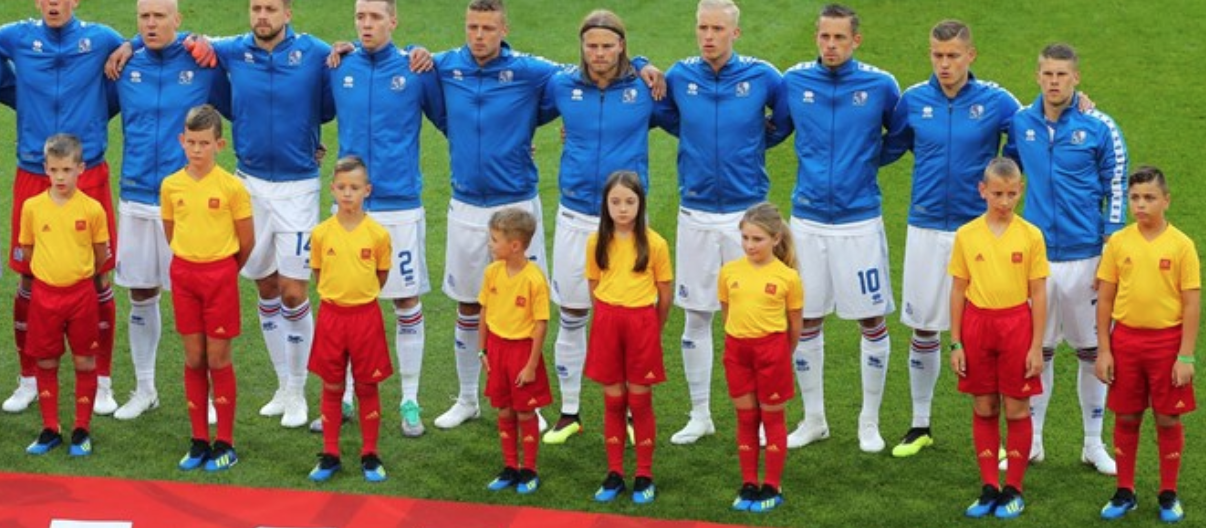 


Team Shaq sent in their weights:
Team Shaq: `Q = [55, 62, 62 ,65, 54, 64, 59, 51, 62, 51, 427]`
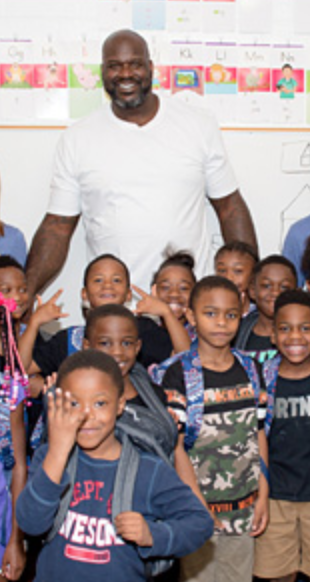 

The teams that sent in their weights were not very accurate though. For instance, the coach for team shaq accidentilly listed his own weight with the players weights and Team Blue-Yellow thought the parents would play with the children, so they listed their own weights along with their childrens weights.


**Part A1 (4 points)** Teams must be no more than 11 pounds different in average weight in order to compete against each other. Compute and print the mean weight and the median weight of each team. You may use built-in mean and median functions to perform this computation.

$\color{red}{\text{Solution to Part A1 in the code cell below.}}$

In [84]:
#Put Code Here
R=[58, 63, 55, 58, 60, 62, 73, 51, 62, 72, 68]
BY=[50, 165, 62, 151, 52, 160, 51, 163, 52, 159, 57]
Q = [55, 62, 62 ,65, 54, 64, 59, 51, 62, 51, 427]

print("The mean for the Red team is: ", np.mean(R))
print("The median for the Red team is: ", np.median(R))
print("The mean for the Blue-and-Yellow team is: ", np.mean(BY))
print("The median for the Blue-and-Yellow team is: ", np.median(BY))
print("The mean for the Shaq team is: ", np.mean(Q))
print("The median for the Shaq team is: ", np.median(Q))


The mean for the Red team is:  62.0
The median for the Red team is:  62.0
The mean for the Blue-and-Yellow team is:  102.0
The median for the Blue-and-Yellow team is:  62.0
The mean for the Shaq team is:  92.0
The median for the Shaq team is:  62.0


**Part A2 (2 points)**
According to the means, which teams can play each other?
According to the medians, which teams can play each other?

$\color{red}{\text{Solution to Part A2 in this cell.}}$

According to the means only the Blue-and-Yellow team and the Shaq team can compete against each other.
According to the medians all teams can compete with each other.

**Part B (2 points)** List a pro and a con for computing the mean and a pro and a con for computing the median.

$\color{red}{\text{Solution to Part B in this cell.}}$

- Mean PRO: the value represents what the observations would be if all the numbers were the same 
- Mean CON: the value can be not very accurate due to an outlier
- Median PRO: the value is not influenced by an outlier so it is a better representation of the data as a whole.
- Median CON: does not account for the distance in value of each observation

**PART C (3 points)** In a boxing competition, the team weights are also sent in for matching purposes.
Teams are matched if their average weights are close together.

<img style="float: right; width: 250px; padding: 3mm;" src="attachment:Screen%20Shot%202021-08-16%20at%206.48.12%20PM.png" alt="Drawing"/>

Two teams (CBC and DPD) each sent 5 boxers weights.
Look closely at the individual weights.

Find the mean, median, and variance for each team. Again, use the built-in NumPy functions.

Team CBC weights = `[50, 54, 155, 200, 243]`

Team DPD wieghts = `[147, 150, 155, 156, 167]`

$\color{red}{\text{Solution to Part C in the code cell below.}}$

In [92]:
#Put Code Here
CBC = [50, 54, 155, 200, 243]
DPD = [147, 150, 155, 156, 167]


print("The mean for the CBC team is: ", np.mean(CBC))
print("The median for the CBC team is: ", np.median(CBC))
print("The variance for the CBC team is: ", np.var(CBC, ddof=1))
print("The mean for the DPD team is: ", np.mean(DPD))
print("The median for the DPD team is: ", np.median(DPD))
print("The variance for the DPD team is: ", np.var(DPD, ddof=1))

The mean for the CBC team is:  140.4
The median for the CBC team is:  155.0
The variance for the CBC team is:  7482.3
The mean for the DPD team is:  155.0
The median for the DPD team is:  155.0
The variance for the DPD team is:  58.5


**Part D (3 points):** 

What does the mean indicate about matching the teams?

What does the median indicate about matching the teams?

What does the variance say about matching the teams?

$\color{red}{\text{Solution to Part D in this cell.}}$

- The difference in the average weight of all the fighters from each team is arounf 15 pounds, which indicate the teams as a whole are not that different in weight.
- The median only indicates that one figher of each team have the same weight, but it is not a good indicator to allow the teams to fight.
- The variance indicates that the difference in weights for the CBC team is considerably larger than the difference in weights for the DPD team